In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

[[ 2.53808837  1.3350931   1.16623386 ...  2.05872261 -1.85085815
   0.98976786]
 [ 0.30990692  0.59375077 -0.03266187 ... -1.98062972  1.07913241
   1.18180485]]
nPoints =  10000


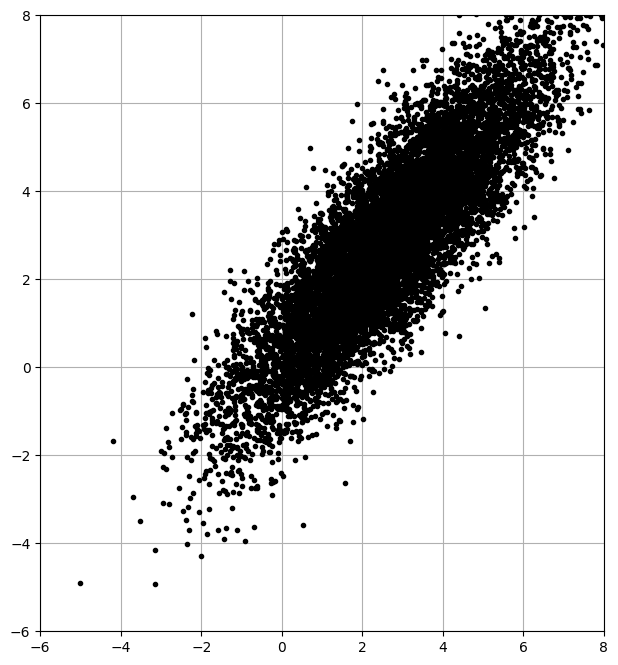

In [4]:
# ładowanie i rysowanie pkt z pliku
import pandas as pd
data = pd.read_csv('4.csv', sep=",", header=None)
data = data.to_numpy()

print(data)

nPoints = data.shape[1]
print("nPoints = ", nPoints)

X = R @ np.diag(sig) @ data + np.diag(xC) @ np.ones((2,nPoints))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

plt.show()

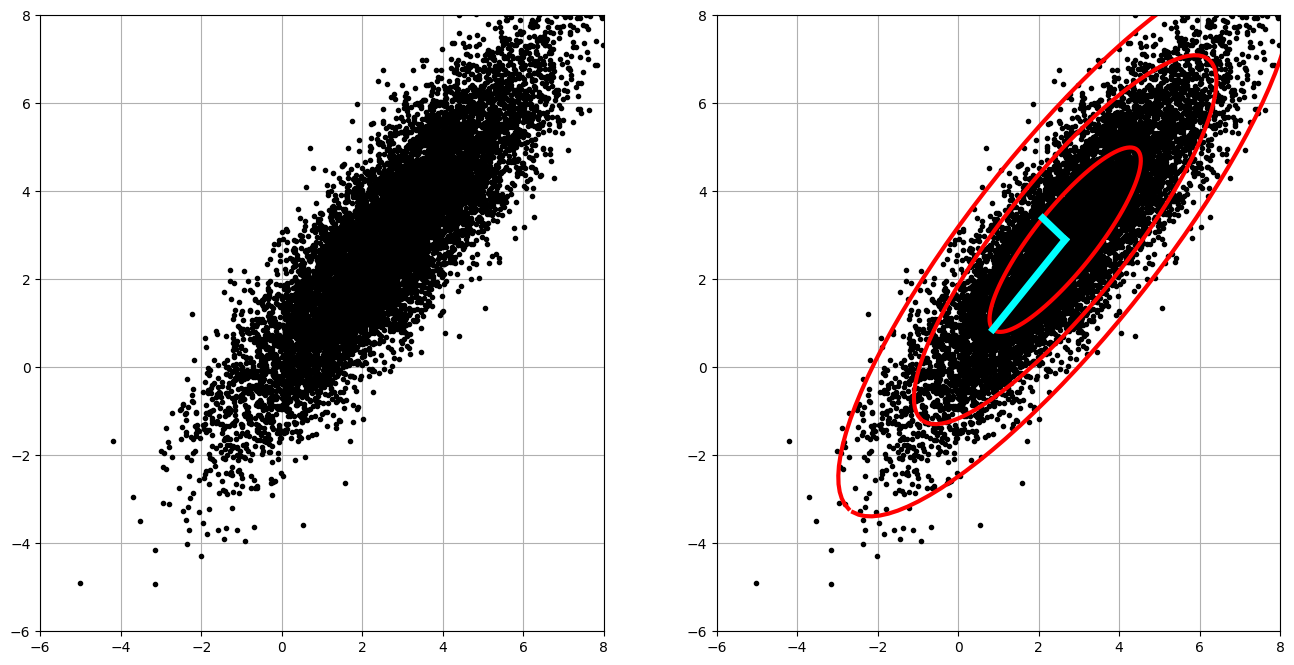

In [5]:
# SVD
Xavg = np.mean(X,axis=1)
B = X - np.tile(Xavg,(nPoints,1)).T
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=0)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

# PCA
theta = 2 * np.pi * np.arange(0,1,0.01)

Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',linewidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='cyan',linewidth=5)

plt.show()